# iLykei Lecture Series

# Machine Learning

# Introduction to Deep Learning

# Project: MNIST by Simple Deep NN


## Yuri Balasanov, &copy; iLykei 2018-2022

##### Main source: [Keras Documentation](https://keras.io/examples/)

This notebook shows how to train a simple deep NN on the MNIST dataset.

In [1]:
from __future__ import print_function

from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import imageio

# Deep network solution

This example of deep network architecture for MNIST data is based on Keras documentation.

Set main parameters.

In [2]:
batch_size = 128
num_classes = 10
epochs = 20

Load the data, create train and test samples.

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Shape x_train: ',x_train.shape)

Shape x_train:  (60000, 28, 28)


In [4]:
y_train[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

Look at the first image.

Shape:  (28, 28)
Raw:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]]
First label:  5


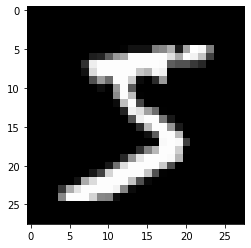

In [5]:
first_image = x_train[0]
print('Shape: ',first_image.shape)
print('Raw: ',first_image[:6,])
first_image = np.array(first_image, dtype='float')
print('First label: ',y_train[0])

plt.imshow(first_image, cmap='gray')
plt.show()

Flatten and normalize the train and test samples images

In [6]:
x_train = x_train.reshape(60000, 784) # each image as vector 784=28*28
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


Convert class vectors to binary class matrices.

In [7]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print('Row size of y_train: ',y_train[0].shape)
print('y_train: \n',y_train[:6])
print('y_test: \n',y_test[:6])

Row size of y_train:  (10,)
y_train: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
y_test: 
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Create model with two hidden layers of 196 units with relu activation function, followed by 0.2 dropouts. Output has 10 units (`num_classes`) with softmax activation.

In [8]:
model = Sequential()
model.add(Dense(196, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(196, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 196)               153860    
_________________________________________________________________
dropout (Dropout)            (None, 196)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 196)               38612     
_________________________________________________________________
dropout_1 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1970      
Total params: 194,442
Trainable params: 194,442
Non-trainable params: 0
_________________________________________________________________


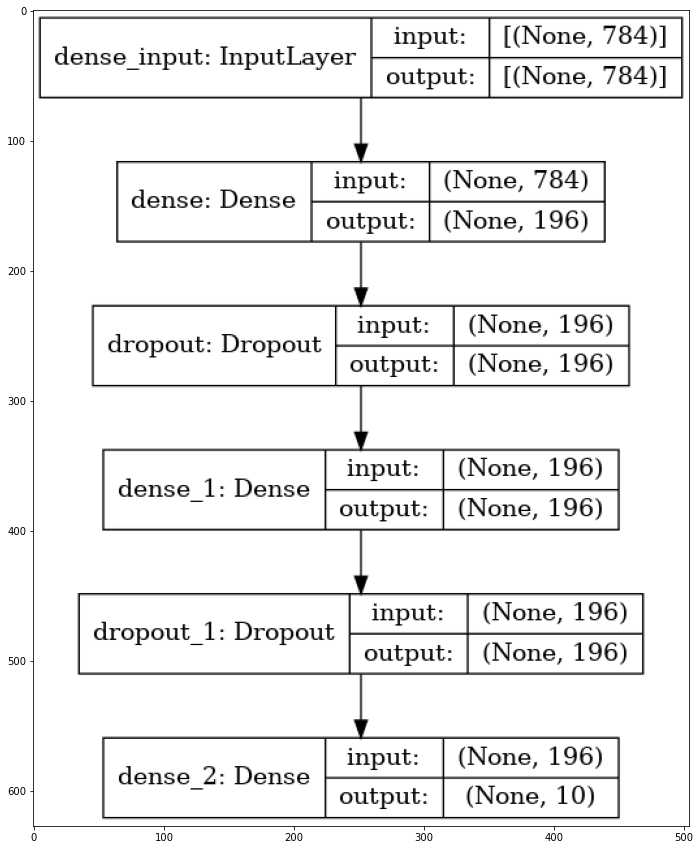

In [9]:
#from keras.utils import plot_model
mpl.rcParams['figure.figsize'] = (15,15)  # plot sizes

plot_model(model, to_file='simple_dense_mnist.png', show_shapes=True)
plt.imshow(imageio.imread('simple_dense_mnist.png'))

Compile the model using `categorical_crossentropy` as loss and `accuracy` as metrics. Try optimizers `RMSprop()` or `Adam`.
Read [one of available sources](http://ruder.io/optimizing-gradient-descent/index.html#gradientdescentoptimizationalgorithms) for more information about optimizers and their comparisons.


Visualize initial weights of the first layer: it contains 196 units, each unit has $784=28 \times 28$ inputs. So, each of 196 vectors of weights has 784 components and can be interpreted as image of size $28 \times 28$. 

Reshaping these vectors into 196 arrays of shape (28,28) allows vizualizing the weights as (28,28) images in which intensity of a pixel corresponds to the size of weight.

Show 25 weights vectors.

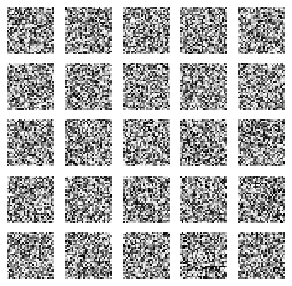

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

w_init = model.layers[0].get_weights()[0]

R, C = 5, 5  # rows, columns
plt.figure(figsize=(R, C))
for i in range(R*C):
    plt.subplot(R, C, i + 1)
    plt.imshow(w_init[:,i].reshape((28, 28)), cmap='Greys', interpolation='nearest')
    plt.axis('off')

Initial weights are random.

Fit the model: 

* Inputs `x_train` and labels `y_train`
* Call fitted model object `history`
* Use parameters' values defined earlier:

`batch_size = 128` <br>
`epochs = 20` <br>

* Define `validation_data` = (x_test,y_test)

In [11]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))

Show keys of variables saved in `history`. Plot accuracy and validation accuracy.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


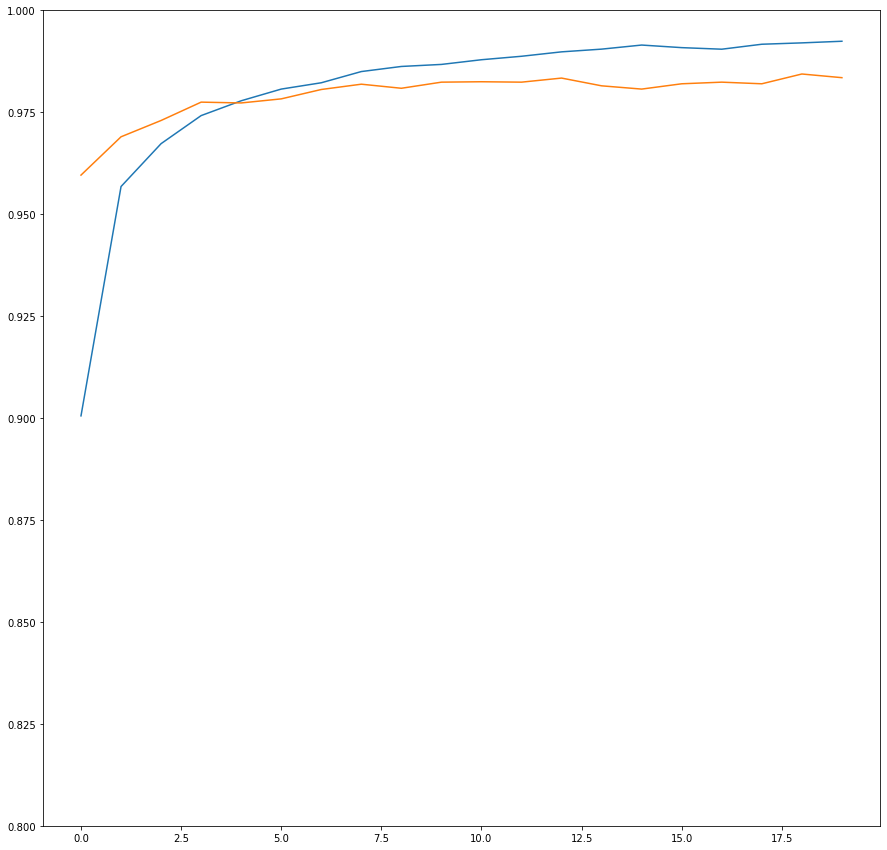

In [12]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim((0.8,1))
plt.show()

Validate the model.

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07184600085020065
Test accuracy: 0.9835000038146973


Check estimated weights and their shapes.

In [14]:
print('Weights matrix: ',model.layers[0].get_weights()[0].shape)
print('Bias vector: ',model.layers[0].get_weights()[1].shape)

Weights matrix:  (784, 196)
Bias vector:  (196,)


Visualize weights of the first layer and compare them with the initial weights.

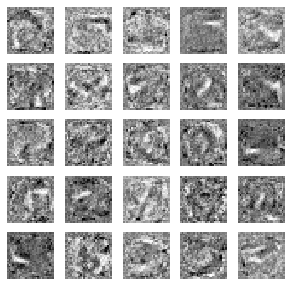

In [15]:
w = model.layers[0].get_weights()[0]

R, C = 5, 5  # rows, columns
plt.figure(figsize=(R, C))
for i in range(R*C):
    plt.subplot(R, C, i + 1)
    plt.imshow(w[:,i].reshape((28, 28)), cmap='Greys', interpolation='nearest')
    plt.axis('off')

# Shallow network solution

Modify the model to `model1` with only 1 hidden layer with 100 units and `relu` activation. Print summary of the model.

![l1](https://ilykei.com/api/fileProxy/documents%2FAdvanced%20Data%20Mining%20and%20Predictive%20Analytics%2031009%2FLecture%20Deep%20Learning%2Fsimple_dense_mnist1.png)

In [16]:
model1 = Sequential()
model1.add(Dense(100, activation='relu', input_shape=(784,)))
model1.add(Dense(num_classes, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


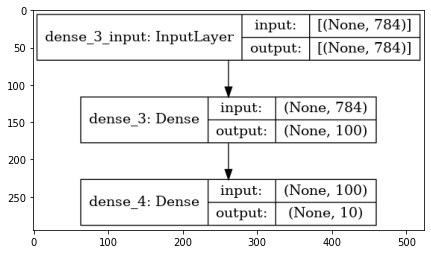

In [17]:
mpl.rcParams['figure.figsize'] = (7,7)  # plot sizes

plot_model(model1, to_file='simple_dense_mnist1.png', show_shapes=True)
plt.imshow(imageio.imread('simple_dense_mnist1.png'))

* Compile the model
* Fit it
* Evaluate it.

In [18]:
model1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [19]:
history1 = model1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


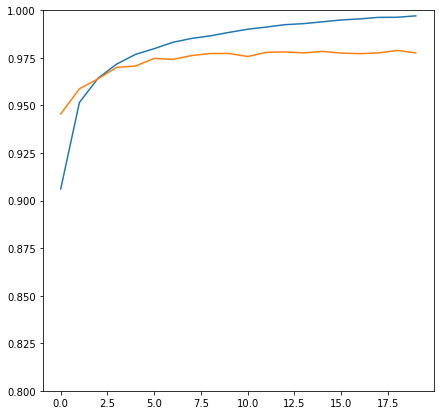

In [20]:
print(history1.history.keys())
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.ylim((0.8,1))
plt.show()

In [21]:
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08551520109176636
Test accuracy: 0.9775999784469604


Visualize the trained weigths again.

In [22]:
w_shallow = model1.layers[0].get_weights()[0]
np.set_printoptions(precision=5)
print('Row 3 of the first weights image:\n',w_shallow[:,0].reshape((28, 28))[3,:])
print('Row 10 of the first weights image:\n',w_shallow[:,0].reshape((28, 28))[11,:])

Row 3 of the first weights image:
 [-0.01036 -0.07771 -0.06246  0.00236  0.09248  0.07705  0.08207  0.06169
  0.02365 -0.04493 -0.10537 -0.27547 -0.4332  -0.39387 -0.19119 -0.05595
 -0.00476  0.06124  0.11873  0.04124  0.01941  0.10034  0.10301  0.31545
  0.16958  0.133    0.05403 -0.02849]
Row 10 of the first weights image:
 [-0.07843  0.0329  -0.01548 -0.24053 -0.16445 -0.25876 -0.17831  0.04351
 -0.04723 -0.08206  0.05876  0.20744  0.02806  0.06504  0.16382 -0.15561
 -0.10847 -0.23211 -0.04956 -0.04745 -0.05756 -0.16684  0.04575  0.01464
  0.08935  0.02616  0.03591  0.04608]


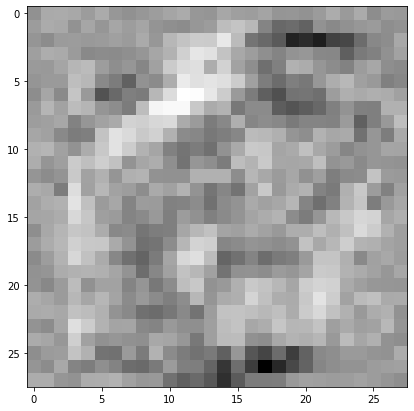

In [23]:
plt.imshow(w_shallow[:,0].reshape((28, 28)), cmap='Greys', interpolation='nearest')

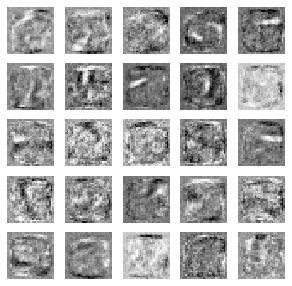

In [24]:
R, C = 5, 5  # rows, columns
plt.figure(figsize=(R, C))
for i in range(R*C):
    plt.subplot(R, C, i + 1)
    plt.imshow(w_shallow[:,i].reshape((28, 28)), cmap='Greys', interpolation='nearest')
    plt.axis('off')

Check how the first 5 numbers from the test sample are predicted. 

In [25]:
print('Actual: \n',y_test[:5],'\n ')
print('Predicted: \n',np.around(np.array(model1.predict(x_test)[:5]), decimals=2))

Actual: 
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] 
 
Predicted: 
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Try to reduce number of units in the single hidden layer to make it less overfitting.